# Ejercicio 1

Número de nodos: 15
Número de terminales: 8
Nombre de cada terminal: A, B, C, D, E, F, G, H
Longitud de cada rama:
Rama None: 0.5
Rama A: 0.2
Rama B: 0.3
Rama C: 0.4
Rama D: 0.7
Rama E: 0.5
Rama F: 0.4
Rama G: 0.6
Rama H: 0.2
Clado más común: None


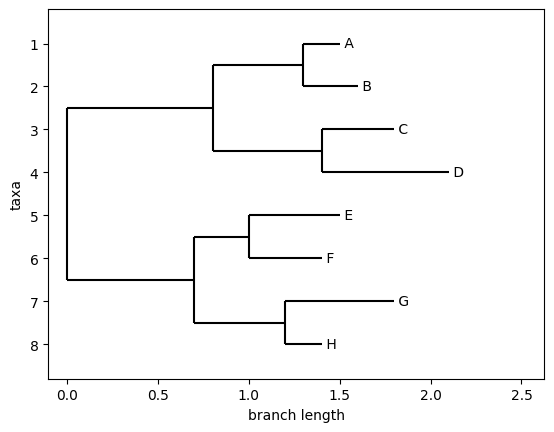

In [1]:
from Bio import Phylo

# Leer el archivo Newick
tree = Phylo.read('simple.dnd', 'newick')

# Obtener información básica
num_nodos = len(tree.get_terminals()) + len(tree.get_nonterminals())  # Número de nodos
num_terminales = len(tree.get_terminals())  # Número de terminales
nombres_terminales = [terminal.name for terminal in tree.get_terminals()]  # Nombre de cada terminal

# Longitud de cada rama
ramas = {}
for clado in tree.find_clades():
    if clado.branch_length:
        ramas[clado.name] = clado.branch_length

# Encontrar el clado más común
ancestros_terminales = [tree.common_ancestor(nombres_terminales)]
for terminal in nombres_terminales[1:]:
    ancestros_terminales.append(tree.common_ancestor([nombres_terminales[0], terminal]))

contador_clados = {ancestro: ancestros_terminales.count(ancestro) for ancestro in set(ancestros_terminales)}
clado_comun = max(contador_clados, key=contador_clados.get).name

# Mostrar la información obtenida
print(f"Número de nodos: {num_nodos}")
print(f"Número de terminales: {num_terminales}")
print(f"Nombre de cada terminal: {', '.join(nombres_terminales)}")
print("Longitud de cada rama:")
for clado, longitud in ramas.items():
    print(f"Rama {clado}: {longitud}")
print(f"Clado más común: {clado_comun}")

Phylo.draw(tree)


# Ejercicio 2
Modifica el árbol filogenético previo cambiando el nombre, la longitud o el color de algunos nodos o ramas. Por ejemplo, cambia el nombre de las especies, la longitud de la rama que conecta alguna especie por 0.5 y el color de la rama que conecta alguna otra especie por rojo.

Longitud de rama modificada para el nodo 'XYZ'


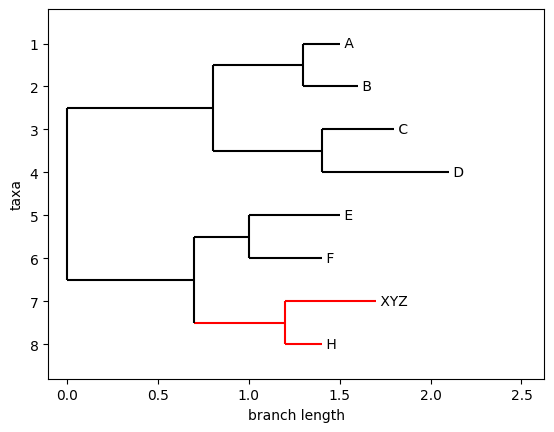

In [2]:
newtree = Phylo.read('simple.dnd','newick')

branch1  = newtree.common_ancestor({'name':'G'},{'name':'H'})
branch1.color='red'

# Buscar el clado (nodo) con nombre 'G'
node_G = None
for clade in newtree.find_clades():
    if clade.name == 'G':
        node_G = clade
        break

# Verificar si se encontró el nodo 'G' y modificar su longitud de rama si existe
if node_G:
    node_G.branch_length = 0.5
    node_G.name = 'XYZ'
    print("Longitud de rama modificada para el nodo 'XYZ'")
else:
    print("Nodo 'G' no encontrado en el árbol")
    
Phylo.draw(newtree)

Árbol por Máxima Parsimonia:


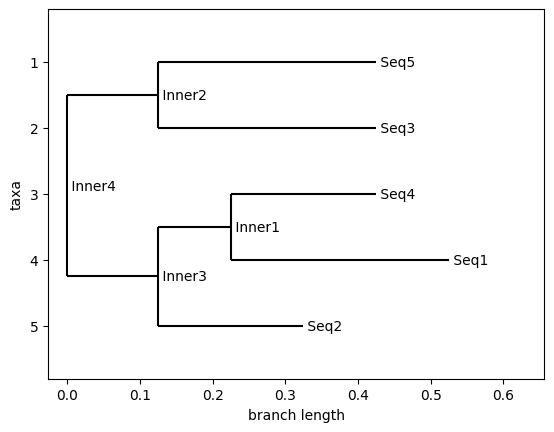


Árbol por Distancia (UPGMA):


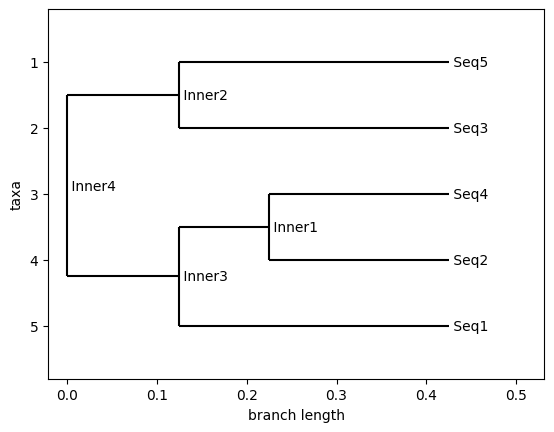


Árbol por Distancia (Neighbor Joining):


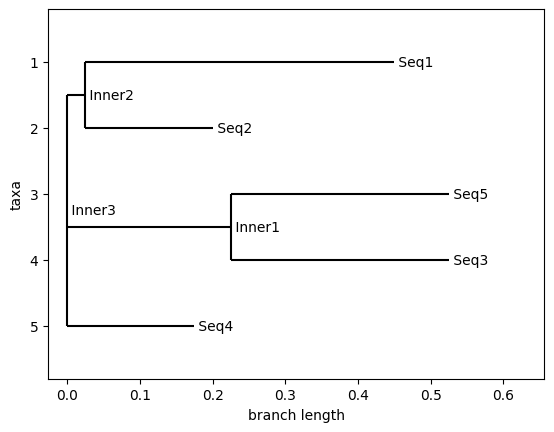

In [3]:
 from Bio import SeqIO, Seq
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import ParsimonyTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, ParsimonyTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator, ParsimonyScorer
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceMatrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO
from io import StringIO

import random

# Generar secuencias aleatorias de 5 nucleótidos
random_sequences = ["".join(random.choices('ACGT', k=5)) for _ in range(5)]

# Crear registros SeqRecord para cada secuencia
records = [SeqRecord(Seq.Seq(seq), id=f"Seq{i+1}") for i, seq in enumerate(random_sequences)]

# Guardar las secuencias en un archivo FASTA
SeqIO.write(records, "random_sequences.fasta", "fasta")

# Leer el archivo FASTA y generar los árboles filogenéticos
alignment = AlignIO.read("random_sequences.fasta", "fasta")

# Método de Máxima Parsimonia
scorer = Phylo.TreeConstruction.ParsimonyScorer()
searcher = Phylo.TreeConstruction.NNITreeSearcher(scorer)
constructor = Phylo.TreeConstruction.ParsimonyTreeConstructor(searcher)
pars_tree = constructor.build_tree(alignment)
#print(pars_tree)

# Método de Distancia - UPGMA
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)
upgma_constructor = DistanceTreeConstructor()
upgma_tree = upgma_constructor.upgma(dm)

# Método de Distancia - Neighbor Joining
nj_constructor = DistanceTreeConstructor()
nj_tree = nj_constructor.nj(dm)

# Imprimir los árboles resultantes
print("Árbol por Máxima Parsimonia:")
Phylo.draw(pars_tree)
print("\nÁrbol por Distancia (UPGMA):")
Phylo.draw(upgma_tree)
print("\nÁrbol por Distancia (Neighbor Joining):")
Phylo.draw(nj_tree)
